## Image Classification with MNIST dataset

### Objective

* Understand how deep learning can solve problems traditional programming methods cannot
* Learn about the [MNIST handwritten digits dataset](http://yann.lecun.com/exdb/mnist/)
* Use the [torchvision](https://pytorch.org/vision/stable/index.html) to load the MNIST dataset and prepare it for training
* Create a simple neural network to perform image classification
* Train the neural network using the prepped MNIST dataset
* Observe the performance of the trained neural network

#### Problem : Image Classification
Image classification, which asks a program to correctly classify an image it has never seen before into its correct class, is near impossible to solve with traditional programming techniques. How could a programmer possibly define the rules and conditions to correctly classify a huge variety of images, especially taking into account images that they have never seen?

#### Solution : Deep Learning
Deep learning excels at pattern recognition by trial and error. By training a deep neural network with sufficient data, and providing the network with feedback on its performance via training, the network can identify, though a huge amount of iteration, its own set of conditions by which it can act in the correct way.

##### Import Libraries

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam

# Visualization tools
import torchvision
import torchvision.transforms.v2 as transforms
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\transforms\v2\__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transfo

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

False

#### The MNIST Dataset
In the history of deep learning, the accurate image classification of the MNIST dataset, a collection of 70,000 grayscale images of handwritten digits from 0 to 9, was a major development. While today the problem is considered trivial, doing image classification with MNIST has become a kind of "Hello World" for deep learning.

#### Training and Validation Data and Labels

When working with images for deep learning, we need both the images themselves, usually denoted as `X`, and also, correct labels for these images, usually denoted as `Y`. Furthermore, we need `X` and `Y` values both for training the model, and then, a separate set of `X` and `Y` values for validating the performance of the model after it has been trained.

Four segments of data is required for the MNIST dataset:

1. `x_train`: Images used for training the neural network
2. `y_train`: Correct labels for the x_train images, used to evaluate the model's predictions during training
3. `x_valid`: Images set aside for validating the performance of the model after it has been trained
4. `y_valid`: Correct labels for the x_valid images, used to evaluate the model's predictions after it has been trained

#### Load the Data into Memory

In [8]:
train_set = torchvision.datasets.MNIST("./data/", train=True, download=True)
valid_set = torchvision.datasets.MNIST("./data/", train=False, download=True)

In [7]:
print(train_set)
print("\n",valid_set)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train

 Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/
    Split: Test


##### Explore the Data

In [ ]:
# take the first x, y pair from train_set and review the data structures

x_0, y_0 = train_set[0]

In [11]:
x_0

In [12]:
type(x_0)

PIL.Image.Image

In [13]:
y_0

5

In [14]:
type(y_0)

int

#### Tensors

If a vector is a 1-dimensional array, and a matrix is a 2-dimensional array, a tensor is an n-dimensional array representing any number of dimensions. Most modern neural network frameworks are powerful tensor processing tools.

##### Convert the images into tensors

In [ ]:
#  convert images into tensors to later process them with a neural network

trans = transforms.Compose([transforms.ToTensor()])     # TorchVision has a useful function to convert PIL Images into tensors with the ToTensor class

x_0_tensor = trans(x_0)

x_0_tensor

C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
# verify data type
x_0_tensor.dtype

torch.float32

In [ ]:
# min value
x_0_tensor.min()

tensor(0.)

In [ ]:
# max value
x_0_tensor.max()

tensor(1.)

PyTorch uses a `C x H x W` convention, which means the first dimension is color channel, the second is height, and the third is width.

In [19]:
x_0_tensor.size()

torch.Size([1, 28, 28])

Since these images are black and white, there is only `1` color channel. The images are square being `28` pixels tall and wide.

##### Convert tensors back into image

Sometimes, it can be hard to interpret so many numbers. TorchVision can convert `C x H x W` tensors back into a PIL image with the to_pil_image function.

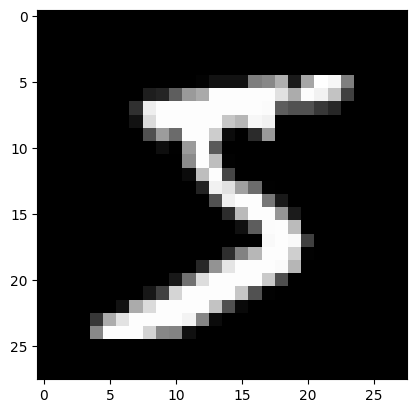

In [21]:
image = F.to_pil_image(x_0_tensor)

plt.imshow(image, cmap='gray')

##### CPU / GPU
By default, a tensor is processed with a [CPU](https://www.arm.com/glossary/cpu).

In [20]:
x_0_tensor.device

device(type='cpu')

To move it to a GPU, we can use the `.cuda` method.

`x_0_gpu = x_0_tensor.cuda()`

`x_0_gpu.device`

The `.cuda` method will fail if a GPU is not recognized by PyTorch. In order to make the code flexible, send the tensor `to` the `device` identified at the start of this notebook. This way, the code will run much faster if a GPU is available, but the code will not break if there is no available GPU.

`x_0_tensor.to(device).device`

#### Preprocess Data

##### Transforms 
[Transforms](https://pytorch.org/vision/stable/transforms.html) are a group of torchvision functions that can be used to transform a dataset.

In [22]:
trans = transforms.Compose([transforms.ToTensor()])    # The Compose fuction combines a list of transforms

In [23]:
# apply the list of transforms to the dataset

train_set.transform = trans
valid_set.transform = trans

##### DataLoaders
With DataLoaders one could show their models the entire dataset at once. Not only does this take a lot of computational resources, but research shows using a smaller batch of data is more efficient for model training.

The `batch size` is something the model developer decides, and the best value will depend on the problem being solved. Research shows `32` or `64` is sufficient for many machine learning problems and is the default in some machine learning frameworks, so use 32 here.

In [24]:
batch_size = 32

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size)

#### Create the Model

Neural networks are composed of layers where each layer performs a mathematical operation on the data it receives before passing it to the next layer. 

To start, create a "Hello World" level model made from 4 components:

1. A Flatten used to convert n-dimensional data into a vector.
2. An input layer, the first layer of neurons
3. A hidden layer, another layor of neurons "hidden" between the input and output
4. An output layer, the last set of neurons which returns the final prediction from the model

##### Create a `layers` variable to hold the list of layers

In [25]:
layers = []
layers

[]

##### Flatten the Images

To flatten an image means to combine all of these images into 1 dimension.

In [26]:
test_matrix = torch.tensor(
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]
)
test_matrix

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [27]:
nn.Flatten()(test_matrix)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Neural networks expect to recieve a batch of data. 

Currently, the Flatten layer sees three vectors as opposed to one 2d matrix. To fix this, "batch" the data by adding an extra pair of brackets. Since test_matrix is now a tensor, do that with the shorthand below. 

In [ ]:
batch_test_matrix = test_matrix[None, :]     # `None` adds a new dimension where `:` selects all the data in a tensor, Order matters here
batch_test_matrix

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [30]:
nn.Flatten()(batch_test_matrix)

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

Add the `Flatten` layer to the list of `layers`

In [31]:
layers = [nn.Flatten()]
layers

[Flatten(start_dim=1, end_dim=-1)]

##### Input Layer

The first layer of neurons connects the flattened image to the rest of the model. 
To do that, use a `Linear layer`. 
This layer will be densely connected, meaning that each neuron in it, and its weights, will affect every neuron in the next layer.

In order to create these weights, Pytorch needs to know the size of inputs and how many neurons to create. 
Since the images are flattened, the size of inputs is the number of channels, number of pixels vertically, and number of pixels horizontally multiplied together.

`Input Size = C * H * W`

In [32]:
input_size = 1 * 28 * 28

Choosing the correct number of neurons is what puts the "science" in "data science" as it is a matter of capturing the statistical complexity of the dataset. For now, use `512` neurons. 

Use the `relu` activation function, which in short, helps the network to learn how to make more sophisticated guesses about data than if it were required to make guesses based on some strictly linear function.

Add the `Input` layer and `Activation function` to the list of `layers`

In [ ]:
layers = [
    nn.Flatten(),
    nn.Linear(input_size, 512),     # Input
    nn.ReLU(),     # Activation for input
]

layers

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=512, bias=True),
 ReLU()]

##### Hidden Layer

Now add an additional densely connected linear layer. 

Just like how the input layer needed to know the shape of the data that was being passed to it, a hidden layer's nn.Linear needs to know the shape of the data being passed to it. 
Each neuron in the previous layer will compute one number, so the number of inputs into the hidden layer is the same as the number of neurons in the previous layer.

`No of hidden layer inputs = No of input layer neurons`

Add the `Hidden` layer and `Activation function` to the list of `layers`

In [34]:
layers = [
    nn.Flatten(),
    nn.Linear(input_size, 512),  # Input
    nn.ReLU(),  # Activation for input
    nn.Linear(512, 512),  # Hidden
    nn.ReLU()  # Activation for hidden
]
layers

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=512, bias=True),
 ReLU()]

##### Output Layer

Finally, add an output layer. 

In this case, since the network is to make a guess about a single image belonging to 1 of 10 possible categories, there will be `10` outputs. 
Each output is assigned a neuron. 
The larger the value of the output neuron compared to the other neurons, the more the model predicts the input image belongs to the output neuron's assigned class.

The `relu` function is not assigned to the output layer. Instead, a `loss function` is applied.

In [35]:
n_classes = 10

Add the `Output` layer to the list of `layers`

In [36]:
layers = [
    nn.Flatten(),
    nn.Linear(input_size, 512),  # Input
    nn.ReLU(),  # Activation for input
    nn.Linear(512, 512),  # Hidden
    nn.ReLU(),  # Activation for hidden
    nn.Linear(512, n_classes)  # Output
]
layers

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=10, bias=True)]

#### Compile the Model

A [Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) model expects a sequence of arguments, not a list, so use the [* operator](https://docs.python.org/3/reference/expressions.html#expression-lists) to unpack the list of layers into a sequence. Print the model to verify these layers are loaded correctly.

In [37]:
model = nn.Sequential(*layers)
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=10, bias=True)
)

Much like tensors, when the model is first initialized, it will be processed on a CPU. To have it process with a GPU, use `to(device)`.

`model.to(device)`

To check which device a model is on, check which device the model parameters are on.

In [38]:
next(model.parameters()).device

device(type='cpu')

In [ ]:
# compile the model
scripted_model = torch.jit.script(model)    # torch.compile is not supported on Windows

#### Train the Model

Now that the training and validation data, and a model is prepared, it's time to train the model with the training data, and verify it with its validation data.

"Training a model with data" is often also called "fitting a model to data." Put another way, it highlights that the shape of the model changes over time to more accurately understand the data that it is being given.

##### Loss and Optimization

Provide the model a function to grade its answers. This function is called a `loss function`. 

Use a type of loss function called `CrossEntropy` which is designed to grade if a model predicted the correct category from a group of categories.

In [43]:
# loss function
loss_function = nn.CrossEntropyLoss()

Next, select an `optimizer` for the model. 

If the loss_function provides a grade, the optimizer tells the model how to learn from this grade to do better next time.

In [49]:
# optimizer
optimizer = Adam(scripted_model.parameters())

##### Calculate Accuracy

While the results of the loss function are effective in helping the model learn, the values can be difficult to interpret for humans. 
This is why data scientists often include other metrics like accuracy.

In order to accurately calculate `accuracy`, compare the number of correct classifications to the total number of predictions made. 

Since the data to the model in shown in batches, the accuracy can be calculated along with these batches.

First, the total number of predictions is the same size as our dataset. 

`Total Predictions = Size of dataset`

Assign the size of the datasets to `N` where N is synonymous with the batch size.

In [46]:
train_N = len(train_loader.dataset)
valid_N = len(valid_loader.dataset)

print(f"Training set : {train_N}\nValidation set : {valid_N}")

Training set : 60000
Validation set : 10000


Next, make a function to calculate the accuracy for each batch. 

The result is a fraction of the total accuracy, so add the accuracy of each batch together to get the total.

In [47]:
def get_batch_accuracy(output, y, N):
    pred = output.argmax(dim=1, keepdim=True)
    correct = pred.eq(y.view_as(pred)).sum().item()
    return correct / N

##### Train Function

Here is where everything comes together. 

Define a function to train the model based on the training data.

In [53]:
def train():
    loss = 0
    accuracy = 0

    scripted_model.train()
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        output = scripted_model(x)
        optimizer.zero_grad()
        batch_loss = loss_function(output, y)
        batch_loss.backward()
        optimizer.step()

        loss += batch_loss.item()
        accuracy += get_batch_accuracy(output, y, train_N)
    print('Train - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

##### Validate Function

Similarly, create a function for validating the model with data it did not train on.

In [ ]:
def validate():
    loss = 0
    accuracy = 0

    scripted_model.eval()
    with torch.no_grad():
        for x, y in valid_loader:
            x, y = x.to(device), y.to(device)
            output = scripted_model(x)

            loss += loss_function(output, y).item()
            accuracy += get_batch_accuracy(output, y, valid_N)
    print('Valid - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

##### The Training Loop

To see how the model is progressing, alternate between training and validation. The model will go through the training data multiple times to get a better and better understanding.

An `epoch` is one complete pass through the entire dataset. Train and validate the model for `5` epochs to see how it learns.

In [ ]:
epochs = 5

for epoch in range(epochs):
    print('Epoch: {}'.format(epoch))
    train()
    validate()

Epoch: 0
Train - Loss: 55.0200 Accuracy: 0.9911
Valid - Loss: 29.9065 Accuracy: 0.9742
Epoch: 1
Train - Loss: 47.6368 Accuracy: 0.9921
Valid - Loss: 24.1597 Accuracy: 0.9803
Epoch: 2
Train - Loss: 43.4944 Accuracy: 0.9926
Valid - Loss: 22.8873 Accuracy: 0.9827
Epoch: 3
Train - Loss: 38.0274 Accuracy: 0.9939
Valid - Loss: 29.1468 Accuracy: 0.9818
Epoch: 4
Train - Loss: 36.2001 Accuracy: 0.9940
Valid - Loss: 29.1024 Accuracy: 0.9814


#### Test the Model

Testing it on the original sample. Use the model like a function:

In [56]:
prediction = scripted_model(x_0_tensor)
prediction

tensor([[-39.9891, -25.6993, -31.3305,   5.1779, -41.5327,  22.9970, -32.2084,
         -30.3787, -17.2282, -11.1192]], grad_fn=<DifferentiableGraphBackward>)

There should be ten numbers, each corresponding to a different output neuron. 

Thanks to how the data is structured, the index of each number matches the corresponding handwritten number. The 0th index is a prediction for a handwritten 0, the 1st index is a prediction for a handwritten 1, and so on.

Use the argmax function to find the index of the highest value.

In [57]:
prediction.argmax(dim=1, keepdim=True)

tensor([[5]])

Verify 

In [58]:
y_0

5

#### Summary

Now a model is ready that can be used to accurately detect and classify hand-written images.

The next step would be to use this model to classify new not-yet-seen handwritten images. This is called inference. 

#### Clear the Memory

In [ ]:
# clear gpu memory, kills kernel

import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

: 